# Part I: Research Question

## Purpose of the Data Mining Report
The primary purpose of this data mining report is to uncover patterns and groupings among hospital patients based on their characteristics and admission information. By identifying clusters of patients with similar profiles, the hospital can tailor its healthcare services more accurately, improving patient care.

## Proposed Question
How can we group patients into distinct clusters based on their characteristics that improve operational efficiency in care delivery?

## Goal of the Data Analysis:

This data analysis aims to identify distinct groups of patients with similar healthcare characteristics and admission patterns. This identification will enable the hospital to:

* Understand the patient characteristics within each cluster.
* Allocate resources more effectively by understanding the demands of each patient group.
* Tailor treatment and intervention programs specifically designed for the needs of each cluster, thereby improving patient outcomes and hospital cost-efficiency.

Given the nature of the data, I propose using the k-means clustering technique with continuous variables for this analysis. This method is chosen for its efficiency and effectiveness in grouping data into clusters based on variance minimization, making it suitable for identifying patterns in patient characteristics and admission duration.

# Part 2: Technique Justification
## Chosen Clustering Technique: K-Means
The k-means clustering technique is an unsupervised learning algorithm that classifies data into a certain number of clusters, determined beforehand. The algorithm functions as follows:

1. **Initialization:** K initial "centroids" are chosen randomly from the dataset. These centroids are the initial centers of the clusters.
2. **Assignment step:** Each data point is assigned to the nearest centroid, thus forming clusters.
3. **Update step:** The centroids are recalculated as the center (mean) of all data points assigned to the respective cluster.
4. **Iteration:** The assignment and update steps are repeated iteratively until the centroids no longer change significantly, implying that the clusters have stabilized and the algorithm has converged.

## Assumption: Spherical and Similar Size Clusters
One fundamental assumption of the k-means clustering technique is that the clusters are spherical and of similar size. This means that the algorithm assumes that the data points are clustered around a central point (centroid) and evenly distributed around that centroid. This spherical assumption influences how the algorithm calculates the distance between data points and centroids, typically using Euclidean distance, which can affect the shape and size of the clusters formed.

## Chosen Packages or Libraries for Python:
- **NumPy:** NumPy is essential for scientific computing with Python. It enables handling large and multi-dimensional arrays and matrices, which is necessary for preparing datasets for clustering.

- **Pandas:** This library is vital for data analysis, providing structures and operations to manipulate numerical tables and time series. It allows us to clean, filter, and prepare datasets before clustering algorithms.

- **Scikit-learn (sklearn):** This is a Python-based machine learning library that offers simple and efficient data mining and analysis tools. It includes a well-integrated implementation of the k-means algorithm for clustering and provides additional functionalities for data preprocessing and evaluation of clustering outcomes.

- **Matplotlib and Seaborn:** These visualization libraries are essential for data analysis. They plot data points in multi-dimensional space, making clusters easier to understand. After clustering, these libraries help visualize the clusters and centroids, aiding in interpreting k-means algorithm results.
  - **psynlig** is a small package for generating plots using matplotlib.

- **summarytools:** This package simplifies data cleaning, exploration, and reporting by providing easy-to-use descriptive functions.

Each library supports the analysis by facilitating different stages of the clustering process, from data preparation to algorithm implementation and results interpretation.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
from matplotlib import pyplot as plt
from psynlig import plot_correlation_heatmap
from sklearn.metrics import silhouette_score

# Part III: Data Preparation

## Data Preprocessing Goal:
One crucial data preprocessing goal relevant to the k-means clustering technique is normalization or standardization of the data. This is particularly important because k-means clustering uses Euclidean distance to assess the similarity between data points; thus, all features should be on a similar scale to prevent any one feature from dominating the distance calculations due to its scale. Normalizing the continuous variables ensures that each feature contributes equally to the distance computations, leading to more meaningful and balanced clusters.

## Initial Dataset Variables for Analysis:
From the provided dataset, the initial variables selected for the clustering analysis are:

* **Age(Continuous):** Age is a fundamental variable as it often correlates with different healthcare needs. Different age groups may show distinct patterns of hospital admissions.

* **Income(Continuous):** Socioeconomic status, proxied by income, can influence healthcare access, frequency of hospital visits, and types of illnesses or conditions leading to admissions.

* **VitD_levels(Continuous):** Vitamin D levels can be an indicator of overall health and specific health conditions, impacting bone health, immune function, and more.

* **Initial_days(Continuous):** This reflects the initial length of stay and can provide insights into the severity of the conditions leading to hospital admissions. It might also hint at the efficiency of the hospital's care and treatment processes.

* **TotalCharge(Continuous):** The total charge for the hospital stay can help identify patterns related to the cost of care, which might correlate with the complexity or severity of conditions treated at the hospital.

* **Additional_charges(Continuous):** Similar to TotalCharge, this can give further insights into the financial aspects of care, possibly reflecting on additional services or treatments required by certain patient groups.


In [2]:
# Load the dataset
data_path = 'medical_clean.csv' 
data = pd.read_csv(data_path)
features = ['Age', 'Income', 'VitD_levels', 'Initial_days','TotalCharge','Additional_charges']

## Steps to Prepare the Data:
The following steps will be used to prepare the data for analysis:

1. **Checking for Missing Values:** 
   1. Check for any missing values in these variables. 
   2. If missing values are present, decide on an imputation strategy or remove the affected records.
2. **Selecting Relevant Features:** 
   1. Removing Discrete and Categorical Variables
   2. Identify highly correlated variables and removing one of each pair.
   3. Perform a visual inspection on the remaining variables to identify potential candidates for clustering.
3. **Checking for Outliers:**
     Use box plots and IQR method to identify outliers.
4. **Normalization:**
     Normalize the continuous variables to ensure they contribute equally to the clustering process.
5. **Final Dataset Compilation:**
    Compile the cleaned and processed data into a final dataset ready for clustering.

In [3]:
dfSummary(data[features])

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[int64],Mean (sd) : 53.5 (20.6)min < med < max:18.0 < 53.0 < 89.0IQR (CV) : 35.0 (2.6),72 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrUlEQVR4nO3asU/bQBiG8e8Sgi6E2gpJYcvSEalDJBaWbh37x3bt1iFInRm6dGJBSMgkiksUY6dDkaoONPY5Jn2t57eGL3Z0z+ELwm02GwP+d5193wBQxsG+bwDt4Zzrm9lh4Ph6s9k8vvQioWInnHP90Wj0KYqiYcj8YrFInHOfX4p1a6hN7hK0ymEURcPLy8vHOI5XVQbn87mfzWbD+/v7QzOrHmrTuwTtE8fx6vT09GfAaP9fL277jdroLgHKKnVGbWqXYPfaelRr7Zepmgtm9vtPd0Xg7F4WvM1HtUZDzfO8Z2aRcy70LUJj8ScnJx/jOB6EXDTP816apu+Oj49/dDqdrOr8w8PD0jn3xcwqHZee1Ym8tUe1xkJN07SXZdn7yWTS7Xa7lResTixZlnkzO7+4uPg2Ho8XVa99c3MzvL6+fjudTr+fnZ0lVWZvb2/fXF1dfZhMJuOQz10z8qgoil4cx0nbjmqNhbperw+890fT6XRVdbHN6sXyPHvkvc9CFixJkr6Z2WAwqHw2T5KkH/q560aeZZnP8/x8tVp9NbPKn7vmEzAqiqIXMlhG42fUkMU2qx9L1evt2mtHbvZngz49PXWrztZ9AtbdJNu09suUsrqbO8SOnoBBm6QMQsVf9rFJyuC/pyCBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCHhoMwPzedzX/WNl8ulNzNL09Tf3d0dvea86rVV77vufJm+fgFFPnL1B2RO9gAAAABJRU5ErkJggg=="">",0(0.0%)
2,Income[float64],Mean (sd) : 40490.5 (28521.2)min < med < max:154.1 < 33768.4 < 207249.1IQR (CV) : 34697.6 (1.4),"9,993 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkElEQVR4nO3cMW/aQBiA4e9KQAYiAyKCjZWhUgdGlv6D/tiu3YrEjsQ/YEMyGIQbB2PcKVPTJNzZ6X3u++xnbnhldHB3pigKAXz36V9PAHiPuyofboxpi0jL4RHnoigey5oP9KosVGNMezgcfgvDcGD7jOPxuDfGfCdWVPlGbYVhOJjP54+9Xi+9dfDhcAiWy+UgiqKWiBDqf67Sr34RkV6vl45Go1+Ww9ulTgZqsZiCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQpv/jPlsLEkvF6vTYtxwB9eDdVlY0mWZUGe55/TNP0pIrZ/oQIi8vYb1XpjyWazGazX687lcmk4zA8QkXduSrHZWLLf79lQgtKwmIIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFSo/1+8iz/OmiITGGJvhXAdUI96GmiRJM8uyL5PJpNFoNG6+aYXrgOrF21DP5/NdEASd2WyWjsfj/S1juQ6ofrwN9Vm327W9EojdWzXCYgoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQre70e15XiMRYSjLF6pZaiux1hEOMrim1qG6nKMRYSjLD6qZajPHI6xiHCUxSsspqACoUIFQoUKhAoVCBUqECpUIFSoQKhQodY/+Lvgyku/EOoLuPLSP4T6Aq689A+hvoIrL/3BYgoq8EatAAux8hFqyViIVYNQS+a6EFssFqMoih6MMUfbKdQxckKtiM1CrIwjNHEcn4wxP0TEZry3kb8r1MPhENz64NPpFIiIJEkSbLfbzkeO1/rZu93uPgiCznQ6Nf1+/+mWsSIicRzfr1arr5PJ5MEmdMfIXT0VRfHXz/0NFyk98m/OwwoAAAAASUVORK5CYII="">",0(0.0%)
3,VitD_levels[float64],Mean (sd) : 18.0 (2.0)min < med < max:9.8 < 18.0 < 26.4IQR (CV) : 2.7 (8.9),"9,976 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkElEQVR4nO3csY7aQBCA4dn4IAYSW4AEHS9wUgpK+rR52LTpUlBczRvQIAQyIHznYIzTpYLk8Jqws/xfP6ctfp1s3+2YsiwFcN2Hex8AeI+nex/AVcaYlog0K44fyrJ8q/M8j45QzzDGtPr9/rcoirpV5ne7XWKM+U6s9SHU85pRFHUnk8lbHMfZNYPb7TacTqfd9XrdFBFCrQmh/kUcx9lgMHitMNqq/TAPjpcpqECoUIFQoQLPqDdQFEVDRCJjTJVxPm2dQag1S9O0kef5l9FoFARBcNUXAxE+bV1CqDU7HA5PYRi2x+NxNhwOk2tm+bR1GaHeSKfT4dNWjXiZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVPD2cp/l2sjodDo16jwP7HgZqu3ayDzPw6IonrMs+ykiVW6SomZehioWayNFRObzeXc2m7WPx2Nwi8Pher6GKiLV10YmScLdesfwMgUVvP6NqpHlgjURT5esEapDbBesifi7ZI1QHWKzYE3E7yVrhOogiwVrIp4uWeNlCioQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFZz+x2mLJRIskPCMs6HaLJFggYR/nA1VLJZIsEDCPy6HKiLVlkg88gIJy+vWzl61dj5UvJ/tdWuXr1oTqkdsrlu7ftWaUD1kcd3a2UcmvqNCBUKFCoQKFW76jMp6cl1c3iT4z1CNMaGIfKzws8Ner/c1juNPFWb//HVptVq9XDu73+9DEZE0TcPlctn+n/P3mrWdXywWn203CW42m70x5oeIVJn/VZblxbnfLfkrwSxU0C0AAAAASUVORK5CYII="">",0(0.0%)
4,Initial_days[float64],Mean (sd) : 34.5 (26.3)min < med < max:1.0 < 35.8 < 72.0IQR (CV) : 53.3 (1.3),"9,997 distinct values","<img src = ""data:image/png;base6

From the table, we can see that all of the selected features are not missing values. Also, notice that the variable 'Age' has a uniform distribution; this makes it unsuitable for the k-means clustering method. Consequently, it will be excluded from the list of features.

In [4]:
features.remove('Age')

## Testing for Correlation
Correlation analysis can help us understand the relationships between variables, which is crucial for several reasons:

- **Redundancy:** Highly correlated variables provide similar information, which can lead to redundancy in your clustering model. Removing or combining such variables can simplify your model without losing significant information.

- **Interpretation:** Clusters formed from variables that are not highly correlated with each other might be easier to interpret. When variables are less correlated, each can contribute unique information to the clustering process, making the resulting groups more distinguishable based on distinct characteristics.

- **Dimensionality Reduction:** If many variables are correlated, it might be a sign that the dataset can be effectively represented in fewer dimensions.

- **Bias:** Including multiple variables that are highly correlated with each other can bias the clustering process towards these variables, potentially overshadowing other important variables.

To test for correlation, we will:

- **Calculate Correlation Matrix:** Compute the correlation matrix for the continuous variables. This matrix will provide the correlation coefficients between every pair of variables in the dataset.

- **Heatmap Visualization:** Visualizing the correlation matrix as a heatmap can help identify pairs of variables with high correlation.

- **Decide on a Threshold:** Determine a threshold for correlation coefficients. Here, we will go with 0.7

- **Addressing correlation:** We will remove one of the variables from pairs of variables that exceed your threshold.

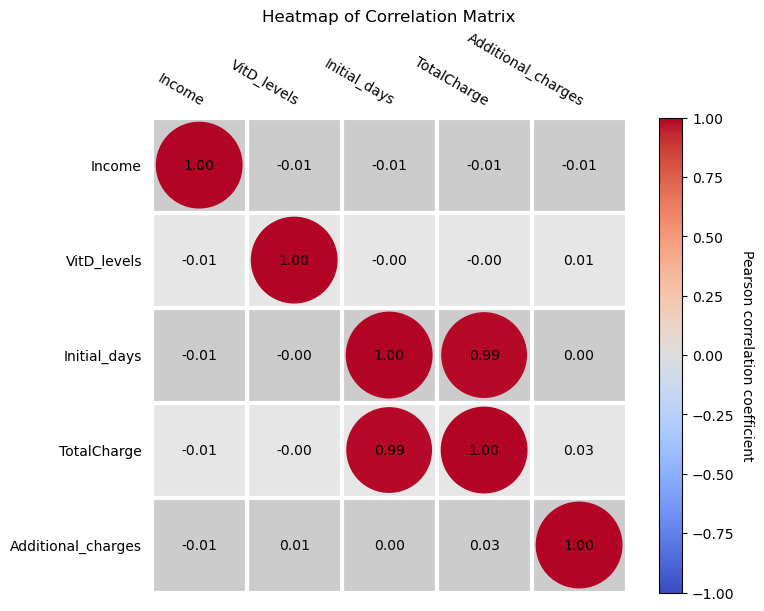

In [5]:
# Plot the correlation matrix
kwargs = {
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
        'cmap': 'coolwarm',
    },
    'figure': {
        'figsize': (8, 6),
    },
}

plot_correlation_heatmap(data=data[features], bubble=True, annotate=True, **kwargs)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [6]:
features.remove('TotalCharge')

As mentioned before, one of the fundamental assumptions of the k-means clustering technique is that the clusters are spherical and of similar size. We will visually inspect the variables to help us choose the most suitable ones.

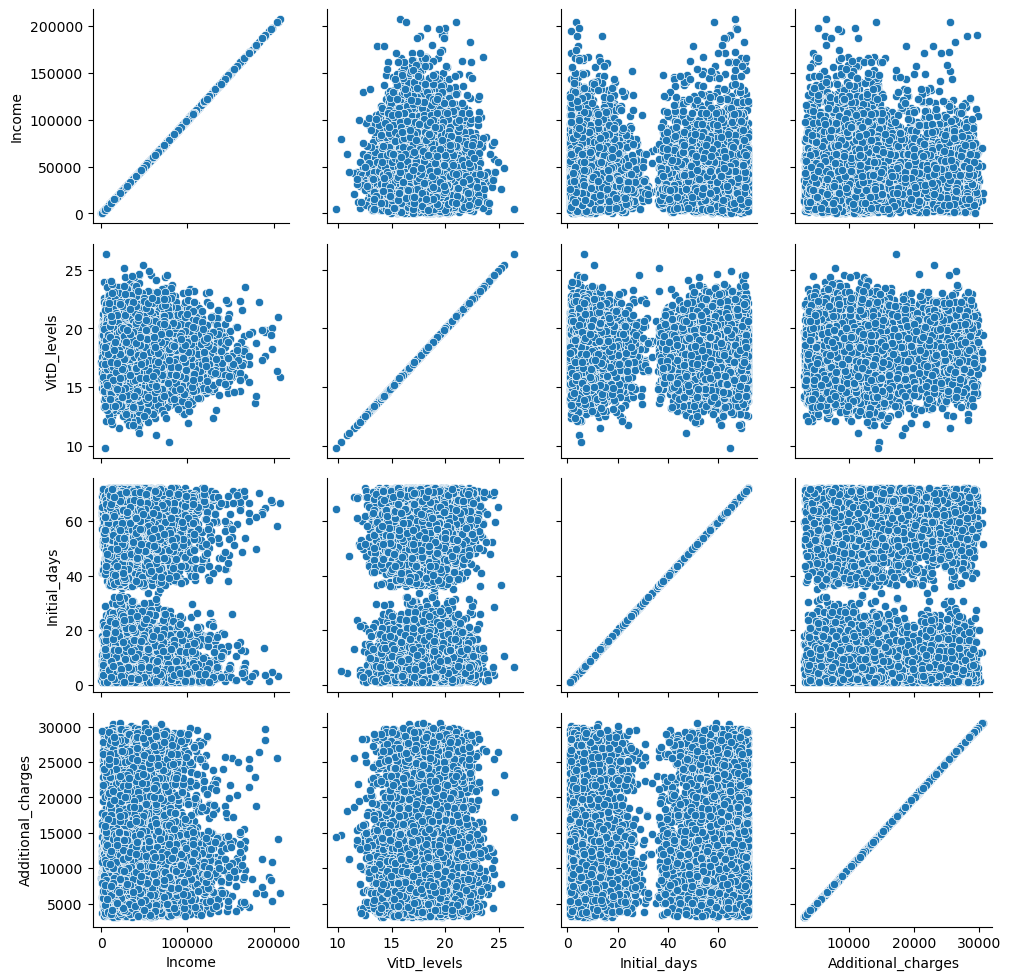

In [7]:
g = sns.PairGrid(data[features])
g.map(sns.scatterplot);

In [8]:
data_selected = data[['VitD_levels', 'Initial_days']]  

## Outliers

After selecting our variables, our next step is to detect and address any outliers that may impact our analysis.

In [9]:
def detect_outliers(data=None, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    iqr_count = ((data < lower_bound) | (data > upper_bound)).sum()
    return iqr_count

In [10]:
print('\nIQR Outliers')
detect_outliers(data_selected)


IQR Outliers


VitD_levels     60
Initial_days     0
dtype: int64

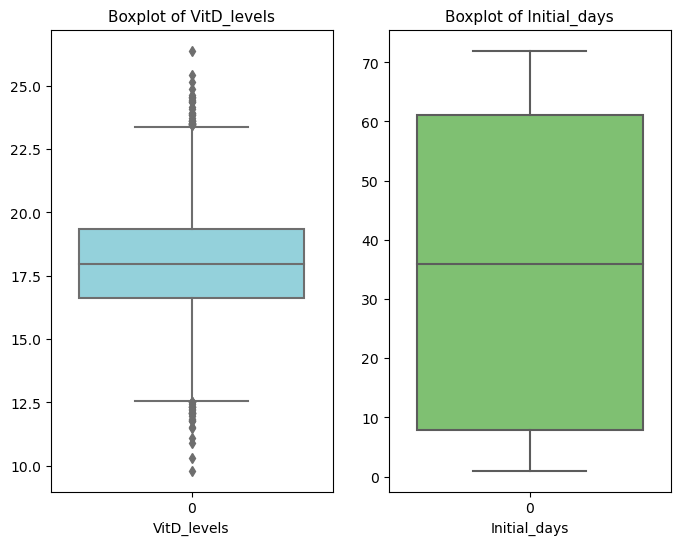

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
colors = ['#88DAE7','#76CD65']

for i, var in enumerate(data_selected.columns):
    if data_selected[var].dtype in ['float64', 'int64']:
        ax = sns.boxplot(data_selected[var],ax=axes[i], color=colors[i])
        ax.set_title("Boxplot of " + var, fontsize=11)
        ax.set_xlabel(var, fontsize=10)
        plt.subplots_adjust(hspace=.5,wspace=.2)
    else:
        raise ValueError(f"Variable {var} is not numeric")
plt.show()

In [12]:
Q1 = data_selected['VitD_levels'].quantile(0.25)
Q3 = data_selected['VitD_levels'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# drop outliers
data_selected = data_selected[(data_selected['VitD_levels']>= lower_bound) & (data_selected['VitD_levels'] <= upper_bound)]

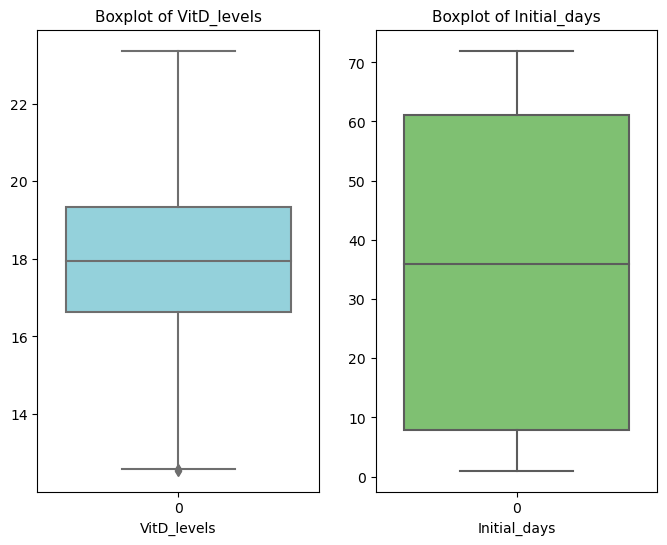

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
colors = ['#88DAE7','#76CD65']

for i, var in enumerate(data_selected.columns):
    if data_selected[var].dtype in ['float64', 'int64']:
        ax = sns.boxplot(data_selected[var],ax=axes[i], color=colors[i])
        ax.set_title("Boxplot of " + var, fontsize=11)
        ax.set_xlabel(var, fontsize=10)
        plt.subplots_adjust(hspace=.5,wspace=.2)
    else:
        raise ValueError(f"Variable {var} is not numeric")
plt.show()

## Standardize the data


In [14]:
# Apply StandardScaler to all relevant variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)
data_scaled_df = pd.DataFrame(data_scaled, columns=data_selected.columns)

In [15]:
dfSummary(data_scaled_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,VitD_levels[float64],Mean (sd) : 0.0 (1.0)min < med < max:-2.8 < -0.0 < 2.7IQR (CV) : 1.4 (0.0),"9,916 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrklEQVR4nO3dMY7aQBiG4X/CggwoRogVdFwgUgpKmtwgh02bLgVcgBvQICQERpBFgHGKpEgksmtsvJ7PvE8/yxSvkMz6n3FJkhjguw9lbwBI46nsDfjKOdc0s0bG5cckSV7uuZ9HR6hXOOeavV7vaxiG3SzrN5vNzjn33cwOGZYT+RWEel0jDMPueDx+6XQ6N8W2WCw+TqfTL8Ph8LlWq90c6na7XTvnvhHrvwj1FZ1O59Dv93/esma9XjeDIGiNRqPDYDBY37I2iqJgMpl0V6tVw8wI9S+EWpB2u31z5H80776ZCuCpHxIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIq+5pfzlGS8HK51O+5n7TiOK6bWeicy/onKjkhUMlQ846SnE6nII7jT4fD4YeZZXmnNJP9fl8/nU6fh8NhLct0gFl1JwQqGarlGCUxM5vP593ZbNY6n8+1Ijb3P8fj8SnrdIBZtScEqhqqmWUbJTH7PU5SxH7SyjEdYFbRCQEepiCBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCHB6xenc8w9lTbzVLacM1fezlt5G2qeuaeyZp7Klnfmyud5K29DtRxzT2XNPJUtz8yV7/NWPodqZtmv0ClqPwqqeCMLD1OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQUOj/+lWPJ4d/CgtV9XjyR+bz/QFFfqNKHk/+qHy/P6Dw1/xUjyd/NL7fH+D9+6h4X77eH8BTPyQQKiQQKiQQKiS8+TDFbD3SKvJMgVdDZbYeaRV9psBb36jM1iOVos8USPU7KrP1SKuoMwVShRpFUXDrp+52u8DMbL/fB8vlsvWe61U/W3Xfeden6esX97qs9UUB1LwAAAAASUVORK5CYII="">",0(0.0%)
2,Initial_days[float64],Mean (sd) : 0.0 (1.0)min < med < max:-1.3 < 0.1 < 1.4IQR (CV) : 2.0 (0.0),"9,937 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACqUlEQVR4nO3dQY7aMBSA4ecyoABqIoQEOy5QqQuWHKKH7RG6YNE1N2CDEAgFQQcRQrpKNVU1HbDxxM/zf+tJiEY/EGPZMVVVCRC6T01fAHCLp7f+wBjTFZGO5fnPVVU9Wx4L/PHfUI0x3eFw+C1N04HNyff7/c4Y851Y4eqtT9ROmqaD2Wz2nGXZ6Z4T53mezOfzwXa77YgIocLJm1/9IiJZlp1Go9Evi/N3LY4B/sFgCioQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqHDTmingFj6X1hMqHsL30npCxaN4XVrvNdSyLNsikhpjbE/BTivK+Fpa7y3U4/HYLori62QyabVarbveYTV2WkHNW6jn8/kpSZLedDo9jcfj3b3Hs9MKXvJ+j9rv922/CkTYaeVdOY7a0+v12n7k9bzEYAoi4j5qL4oiKcvyy+l0+iEith9MryJU1KxH7SIiy+VysFgsepfLpeXj4ggVf7Edte92O6+3aUyhQgVChQqEChUIFSoQKlQgVKhAqFCB31Ej4zAN6nUK1BWhRsRlGtT3FKgrQo2L9TSo7ylQV4QaIZtpUN9ToK4YTEEFQoUKhAoVCBUqECpUIFSoEPTPU477ArAnQESCDdV1XwD2BIhLsKG67AvAngDxCTbUmsO+AEHPtLwm5LX1TQo+1I8k9LX1TSLUsAS9tr5JhBqgUNfWN4nfUaECoUIFQoUK3KN6EOu6pSYR6oPFvG6pSYT6eNGuW2pStKE2/aCLGNctNSnKUHnQRXyiDJUHXcQnylBrLg+6KMsyFbtbB0buHtwUap7nyb0nPhwOiYjI8XhM1ut17z2Pd33t1Wr12fbWoR65bzabn/e+rub/mcvxt/T1G3YajWBIJMM8AAAAAElFTkSuQmCC"">",0(0.0%)


In [16]:
data_scaled_df.to_csv('processed_medical_data.csv')

# Part IV: Analysis

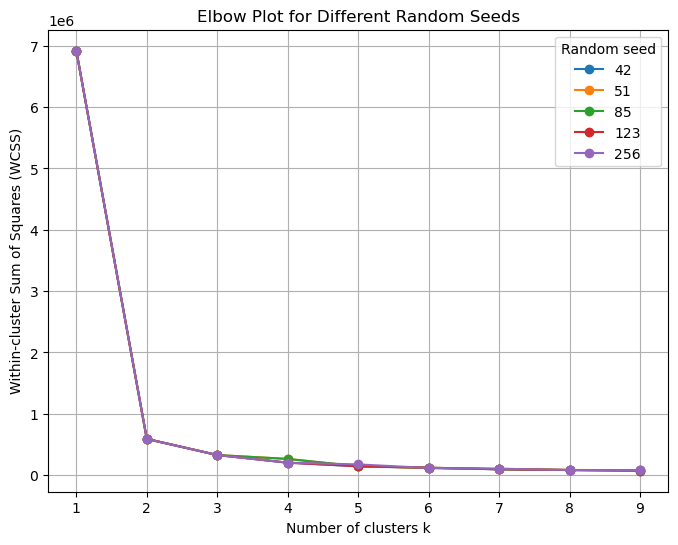

In [17]:
X = np.array(data_selected.loc[:,['Initial_days',
                       'VitD_levels']])    \
                        .reshape(-1, 2)
                        
plt.figure(figsize=(8, 6))
num_clusters = range(1, 10)
seeds = seeds = [42, 51, 85, 123, 256]

for seed in seeds:
    wcss = []
    for i in num_clusters:
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto', random_state=seed)
        kmeans.fit(data_selected)
        wcss.append(kmeans.inertia_)
        

    plt.plot(num_clusters, wcss, marker='o', label=seed)
    

plt.title('Elbow Plot for Different Random Seeds')
plt.xlabel('Number of clusters k')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.legend(title='Random seed', loc='upper right')
plt.grid(True)
plt.show()

What This Plot Displays

**Stability:** If the elbow point is consistent across different seeds, it suggests that the clustering is stable and not very sensitive to the initial conditions.

**Optimal k:** A k value where the reduction in WCSS begins to diminish across most seeds—this is the "elbow" point, suggesting a good number of clusters.

**Variability:** Significant variability in WCSS across seeds for the same k might suggest that the clustering could be sensitive to initialization, in which case further investigation or a different method might be warranted.

In our case, the elbow point is consistent across different seeds, and "elbow" is at 2, suggesting we should use 2 clusters.

In [18]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init='auto', random_state=123)
clusters = kmeans.fit_predict(X)

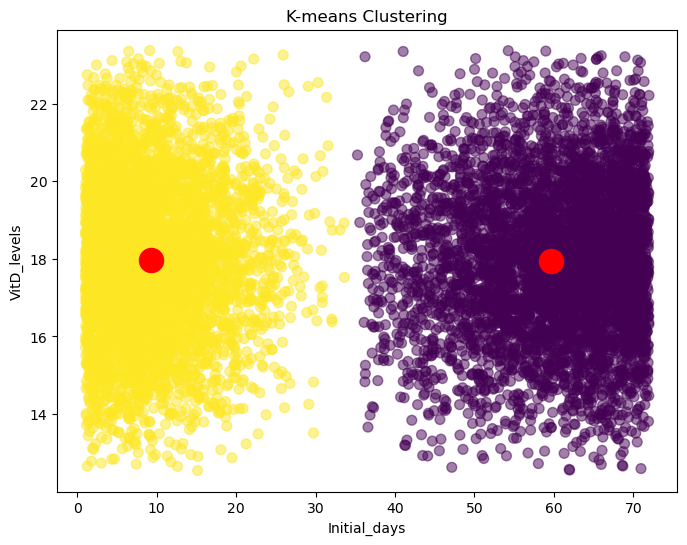

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.ylabel('VitD_levels')
plt.xlabel('Initial_days')
plt.show()

# Part V: Data Summary and Implications

In [20]:
K = range(2, 9)
fits = []
score = []


for k in K:
    model = KMeans(n_clusters = k, random_state = 123, n_init='auto').fit(X)
    
    fits.append(model)
    
    score.append(silhouette_score(X, model.labels_, metric='euclidean'))



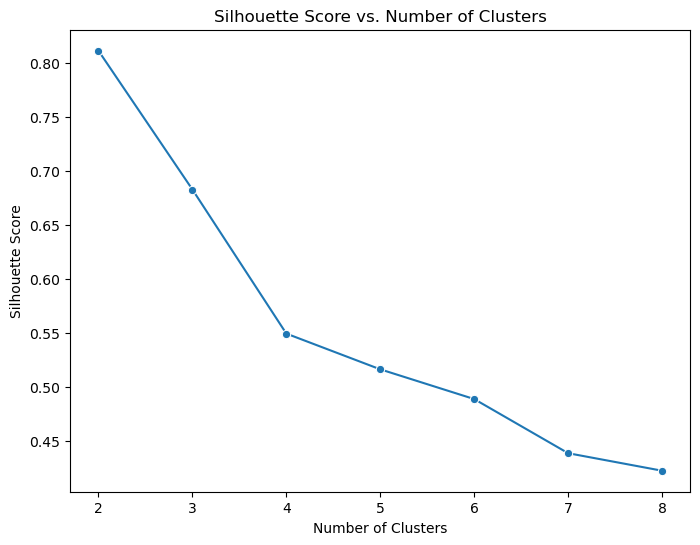

n = 2	Score: 0.81
n = 3	Score: 0.68
n = 4	Score: 0.55
n = 5	Score: 0.52
n = 6	Score: 0.49
n = 7	Score: 0.44
n = 8	Score: 0.42


In [34]:
plt.figure(figsize =(8,6))
sns.lineplot(x = K, y = score,markers=True, marker='o');
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

for i,s in enumerate(score):
    print(f'n = {K[i]}\tScore: {s.round(2)}')

To determine the accuracy of the model, we utilized a silhouette score. The score indicates that the VitD_levels and Initial_days cluster have a score close to 1 when n = 2; this means they are in the correct group. In contrast, if the average score were closer to 0, we would know that the data was not correctly clustered.

## Results
The results show no clear correlation between the two variables. However, the graph shows patients usually stay in the hospital for 30 or less or between 40 and 70 days, with a gap of around 30-40 days.This pattern may be worth investigating using different techniques. 

## Limitations
One limitation of this study is the poor quality of data. Although the variables are not ideal for unsupervised learning, I did my best to extract meaningful information.

## Recommendations
Before extracting actionable insights, evaluating the variables involved in data collection is imperative. Doing so can ensure that the data used for analysis is accurate, reliable, and comprehensive. Only then can one confidently conclude the data and make informed decisions based on the analysis results. Therefore, I recommend allocating sufficient time and resources towards these preliminary steps, as they form the foundation of any successful data-driven initiative.